In [1]:
#import sklearn
import pandas as pd
import pyprojroot

In [91]:
root_path =  pyprojroot.here()
data_processed_folder = (root_path / "data"/'processed')

In [92]:
df = pd.read_csv(data_processed_folder/'pictures.csv')

In [93]:
df.columns

Index(['filename', 'b_bgr_mean', 'g_bgr_mean', 'r_bgr_mean', 'h_hsv_mean',
       's_hsv_mean', 'v_hsv_mean', 'l_lab_mean', 'a_lab_mean', 'b_lab_mean',
       'b_bgr_std', 'g_bgr_std', 'r_bgr_std', 'h_hsv_std', 's_hsv_std',
       'v_hsv_std', 'l_lab_std', 'a_lab_std', 'b_lab_std', 'image', 'page',
       'color', 'index'],
      dtype='object')

In [94]:
feature_columns = ['b_bgr_mean','g_bgr_mean','r_bgr_mean','h_hsv_mean','s_hsv_mean',\
'v_hsv_mean','l_lab_mean','a_lab_mean','b_lab_mean','b_bgr_std','g_bgr_std','r_bgr_std',\
'h_hsv_std','s_hsv_std','v_hsv_std','l_lab_std','a_lab_std','b_lab_std'
]
target_column = 'color'

In [95]:
X = df[feature_columns]
y = df[target_column].values

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [97]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

In [99]:
def generic_train(model,tunning,name) -> pd.DataFrame:
    classifier = GridSearchCV(model,tunning,cv=5,return_train_score=False,n_jobs=-1,verbose=0)
    classifier.fit(x_train,y_train)
    df_score_lr = pd.DataFrame(classifier.cv_results_)[['params','mean_test_score','std_test_score']]
    df_score_lr['classifier'] = name
    return df_score_lr.sort_values(by='mean_test_score',ascending=False)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1,max_iter=1000,random_state=42)
tunning = {'C':[0.1,0.2,0.3,0.5,0.8,1.2,2,3]}
report_logistic = generic_train(model,tunning,'logistic_regression')

report_logistic

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,params,mean_test_score,std_test_score,classifier
7,{'C': 3},0.858089,0.004439,logistic_regression
6,{'C': 2},0.857026,0.004897,logistic_regression
5,{'C': 1.2},0.855964,0.005356,logistic_regression
4,{'C': 0.8},0.853675,0.005078,logistic_regression
3,{'C': 0.5},0.852367,0.007347,logistic_regression
2,{'C': 0.3},0.851549,0.007998,logistic_regression
1,{'C': 0.2},0.848770,0.008245,logistic_regression
0,{'C': 0.1},0.845337,0.009108,logistic_regression


In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=300,random_state=42,n_iter_no_change=400,learning_rate_init=0.001,batch_size=50)
tunning = {'alpha':[0,0.5,1],'hidden_layer_sizes':[(100),(200),(400),(50,50),(10,10,10)],'solver':['lbfgs','adam']}

report_neural = generic_train(model,tunning,'neural_network')

report_neural

In [56]:
report_neural

,params,mean_test_score,std_test_score,classifier
24,"{'alpha': 1, 'hidden_layer_sizes': 400, 'solve...",0.876482,0.003696,neural_network
22,"{'alpha': 1, 'hidden_layer_sizes': 200, 'solve...",0.874193,0.001342,neural_network
1,"{'alpha': 0, 'hidden_layer_sizes': 100, 'solve...",0.873702,0.002914,neural_network
20,"{'alpha': 1, 'hidden_layer_sizes': 100, 'solve...",0.869778,0.005082,neural_network
14,"{'alpha': 0.5, 'hidden_layer_sizes': 400, 'sol...",0.869370,0.003118,neural_network
5,"{'alpha': 0, 'hidden_layer_sizes': 400, 'solve...",0.868634,0.004812,neural_network
12,"{'alpha': 0.5, 'hidden_layer_sizes': 200, 'sol...",0.868552,0.004676,neural_network
10,"{'alpha': 0.5, 'hidden_layer_sizes': 100, 'sol...",0.868143,0.004703,neural_network
3,"{'alpha': 0, 'hidden_layer_sizes': 200, 'solve...",0.867408,0.002955,neural_network
26,"{'alpha': 1, 'hidden_layer_sizes': (50, 50), '...",0.867162,0.003257,neural_network


In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1, n_jobs=-1,warm_start=True)
tunning = {'n_estimators':list(range(10, 201, 10)),'max_depth':[10, 15, 20, 25]}

report_random_forest = generic_train(model,tunning,'random_forest')

report_random_forest

,params,mean_test_score,std_test_score,classifier
76,"{'max_depth': 25, 'n_estimators': 170}",0.836916,0.005935,random_forest
54,"{'max_depth': 20, 'n_estimators': 150}",0.836671,0.005483,random_forest
77,"{'max_depth': 25, 'n_estimators': 180}",0.836507,0.006111,random_forest
48,"{'max_depth': 20, 'n_estimators': 90}",0.836426,0.005992,random_forest
52,"{'max_depth': 20, 'n_estimators': 130}",0.836426,0.005472,random_forest
...,...,...,...,...
20,"{'max_depth': 15, 'n_estimators': 10}",0.813537,0.005317,random_forest
1,"{'max_depth': 10, 'n_estimators': 20}",0.811575,0.003451,random_forest
40,"{'max_depth': 20, 'n_estimators': 10}",0.809124,0.006940,random_forest
60,"{'max_depth': 25, 'n_estimators': 10}",0.805690,0.003514,random_forest


In [42]:
from sklearn.svm import SVC

model = SVC(random_state=1)

tunning = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

report_svm = generic_train(model,tunning,'svm')

report_svm

,params,mean_test_score,std_test_score,classifier
17,"{'C': 100, 'gamma': 0.01}",0.878526,0.002072,svm
22,"{'C': 1000, 'gamma': 0.01}",0.875501,0.001424,svm
23,"{'C': 1000, 'gamma': 0.001}",0.874274,0.005467,svm
12,"{'C': 10, 'gamma': 0.01}",0.869779,0.002657,svm
11,"{'C': 10, 'gamma': 0.1}",0.866836,0.002569,svm
18,"{'C': 100, 'gamma': 0.001}",0.863974,0.003847,svm
6,"{'C': 1, 'gamma': 0.1}",0.863810,0.004388,svm
24,"{'C': 1000, 'gamma': 0.0001}",0.859151,0.006949,svm
16,"{'C': 100, 'gamma': 0.1}",0.852775,0.004292,svm
7,"{'C': 1, 'gamma': 0.01}",0.849260,0.003987,svm


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_iter_no_change=100,learning_rate=0.5)
tunning  = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,10,100]
}

report_gbc = generic_train(model,tunning,'gradient_boosting')

report_gbc

,params,mean_test_score,std_test_score,classifier
5,"{'max_depth': 10, 'n_estimators': 50}",0.828741,0.008447,gradient_boosting
7,"{'max_depth': 10, 'n_estimators': 500}",0.828088,0.004189,gradient_boosting
6,"{'max_depth': 10, 'n_estimators': 250}",0.827760,0.005790,gradient_boosting
3,"{'max_depth': 1, 'n_estimators': 500}",0.825553,0.010671,gradient_boosting
2,"{'max_depth': 1, 'n_estimators': 250}",0.820405,0.011329,gradient_boosting
1,"{'max_depth': 1, 'n_estimators': 50}",0.805853,0.006249,gradient_boosting
11,"{'max_depth': 100, 'n_estimators': 500}",0.789668,0.006919,gradient_boosting
9,"{'max_depth': 100, 'n_estimators': 50}",0.787950,0.005741,gradient_boosting
10,"{'max_depth': 100, 'n_estimators': 250}",0.787379,0.005169,gradient_boosting
4,"{'max_depth': 10, 'n_estimators': 5}",0.786561,0.006137,gradient_boosting


In [58]:
report_neural[0:1]

,params,mean_test_score,std_test_score,classifier
24,"{'alpha': 1, 'hidden_layer_sizes': 400, 'solve...",0.876482,0.003696,neural_network


# Best Models

In [60]:
best_models_df = pd.concat([report_gbc[0:1],report_svm[0:1],report_random_forest[0:1],report_neural[0:1],report_logistic[0:1]])

In [61]:
best_models_df.sort_values(by='mean_test_score',ascending=False)

,params,mean_test_score,std_test_score,classifier
17,"{'C': 100, 'gamma': 0.01}",0.878526,0.002072,svm
24,"{'alpha': 1, 'hidden_layer_sizes': 400, 'solve...",0.876482,0.003696,neural_network
7,{'C': 3},0.858089,0.004439,logistic_regression
76,"{'max_depth': 25, 'n_estimators': 170}",0.836916,0.005935,random_forest
5,"{'max_depth': 10, 'n_estimators': 50}",0.828741,0.008447,gradient_boosting


# Inspect Best Model

In [62]:
from sklearn.svm import SVC

model = SVC(random_state=1,C=100,gamma=0.01)

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.8869543894065719

In [63]:
model.score(x_train,y_train)

0.9177634267963705

In [65]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, x_test, y_test)

In [79]:
df_feature_importance = pd.DataFrame({"feature":feature_columns,"importance":perm_importance.importances_mean})

In [81]:
df_feature_importance= df_feature_importance.sort_values(by='importance',ascending=False)
df_feature_importance= df_feature_importance.reset_index(drop=True)
df_feature_importance

,feature,importance
0,b_lab_mean,0.278470
1,a_lab_mean,0.256204
2,s_hsv_mean,0.165130
3,v_hsv_mean,0.132467
4,a_lab_std,0.130554
5,r_bgr_mean,0.093183
6,l_lab_std,0.082050
7,g_bgr_std,0.081412
8,v_hsv_std,0.078323
9,g_bgr_mean,0.078028


In [103]:
features =df_feature_importance['feature'].values.tolist()

In [113]:
from sklearn.metrics import precision_recall_fscore_support
info = []

for i in range(1,len(features)):
    features_split = features[0:i]
    X = df.loc[:, features_split]
    X = scaler.fit_transform(X)
    y = df[target_column].values
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)
    model = SVC(random_state=1,C=100,gamma=0.01)
    model.fit(x_train,y_train)

    score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    precision,recall,fscore,_ = precision_recall_fscore_support(y_test, y_pred, average='weighted',zero_division=0)
    info.append([i,score,precision,recall,fscore])
    print(f'#features={i} - score=',"{:.2f}".format(score))
    print('precision_recall_fscore', precision,recall,fscore)
    print()

    

#features=1 - score= 0.48
precision_recall_fscore 0.3332546600579499 0.4767042667974497 0.3842820866721098

#features=2 - score= 0.66
precision_recall_fscore 0.6151123457262955 0.6581657675331045 0.6286728454686507

#features=3 - score= 0.73
precision_recall_fscore 0.7342895743617687 0.7341834232466895 0.7323337981389584

#features=4 - score= 0.79
precision_recall_fscore 0.7943771821757729 0.7945071113290829 0.793809569010614

#features=5 - score= 0.82
precision_recall_fscore 0.8204436760063885 0.8207454634624816 0.8201600898947605

#features=6 - score= 0.82
precision_recall_fscore 0.821679843570478 0.8219715546836684 0.8213367673134461

#features=7 - score= 0.86
precision_recall_fscore 0.8552362241068016 0.8555664541441883 0.8550742117736291

#features=8 - score= 0.86
precision_recall_fscore 0.8633184919193214 0.8631682197155468 0.8628902353107014

#features=9 - score= 0.86
precision_recall_fscore 0.8603263301369306 0.8602256007846983 0.8598825388714837

#features=10 - score= 0.86
pre

In [116]:
df_feature_elimination =  pd.DataFrame(info,columns=['#features','score','precision','recall','fscore'])

<AxesSubplot: xlabel='#features'>

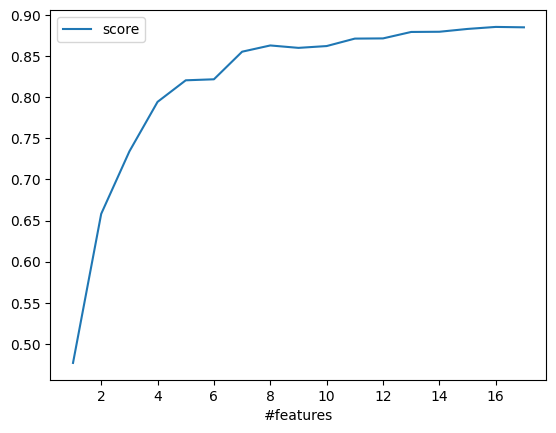

In [118]:
df_feature_elimination.plot(x='#features',y='score')

<AxesSubplot: xlabel='#features'>

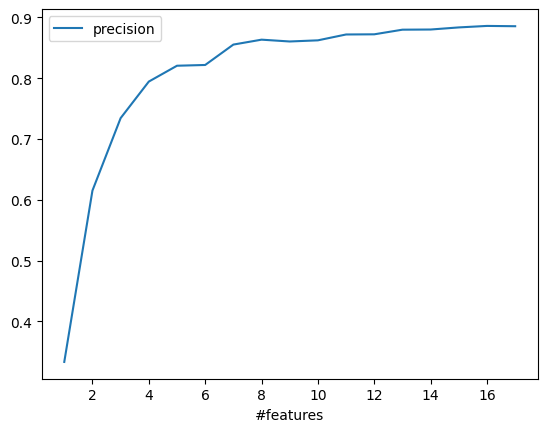

In [119]:
df_feature_elimination.plot(x='#features',y='precision')

<AxesSubplot: xlabel='#features'>

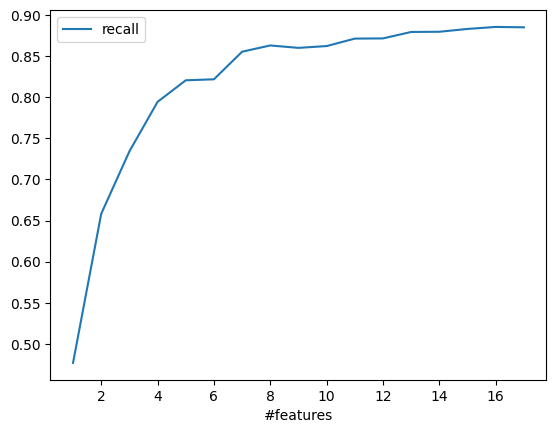

In [120]:
df_feature_elimination.plot(x='#features',y='recall')

<AxesSubplot: xlabel='#features'>

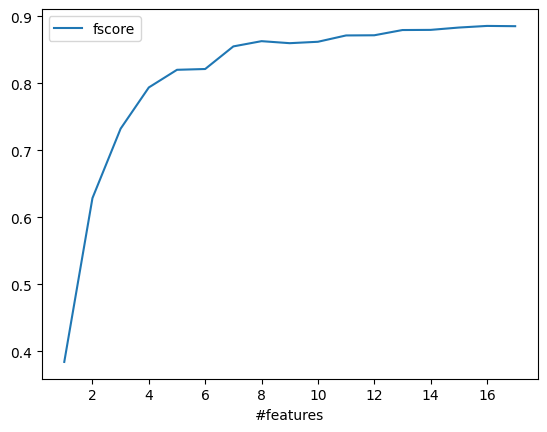

In [121]:
df_feature_elimination.plot(x='#features',y='fscore')